In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# clean and readable with white background and gridlines.
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("genai_usage_trends.csv")

In [4]:
df['date']=pd.to_datetime(df['date'])
#Converts the date column into actual date format 


In [5]:
print(df.head())

        date    ChatGPT     DALL-E  Google Bard  Claude AI  GitHub Copilot
0 2024-07-01  80.365348  66.603331    56.901440  27.755760       22.877995
1 2024-07-08  84.702373  66.508077    45.987795  21.656805       23.579080
2 2024-07-15  68.793663  70.443830    52.240925  28.053349       25.664499
3 2024-07-22  79.878062  60.168031    50.125924  23.572887       18.439374
4 2024-07-29  83.737159  65.455624    50.976761  34.617465       22.468648


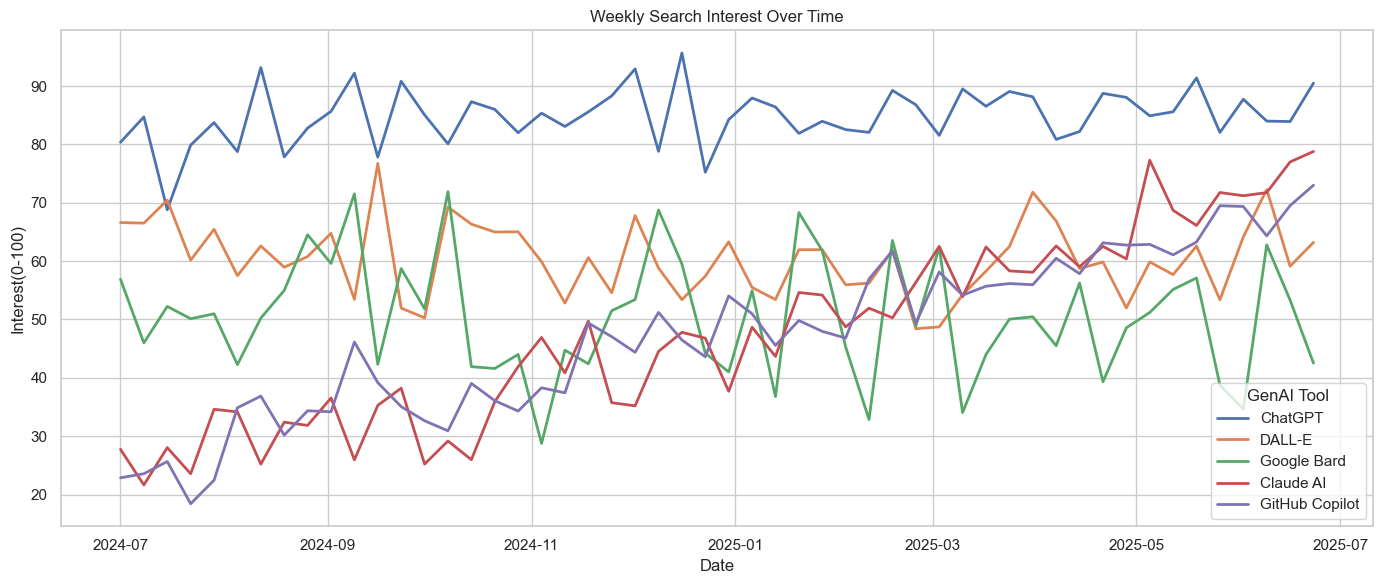

In [6]:
#Line Chart
plt.figure(figsize=(14,6))    #Creates a blank canvas  14 inches wide, 6 inches tall
for column in df.columns[1:]:  #Loops through all the columns except the first one i.e 'date'
    plt.plot(df['date'], df[column], label=column, linewidth=2)    #X-axis: df['date'] and Y-axis: df[column]
   # plt.plot(df['date'],df['ChatGPT'], label='ChatGPT', linewidth=2)
plt.title("Weekly Search Interest Over Time")
plt.xlabel("Date")
plt.ylabel("Interest(0-100)")
plt.legend(title="GenAI Tool")
plt.tight_layout()
plt.show()    

C:\Users\USER\AppData\Local\Temp\ipykernel_10888\61984418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_interest.index, y=avg_interest.values, palette="viridis")


<Axes: xlabel='None'>

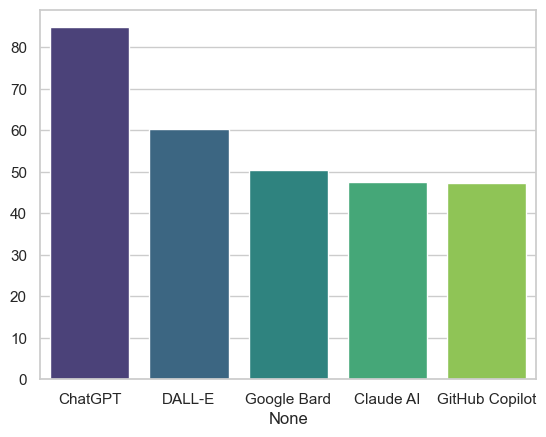

In [7]:
avg_interest= df.mean(numeric_only=True).sort_values(ascending=False)
sns.barplot(x=avg_interest.index, y=avg_interest.values, palette="viridis")

In [8]:
for column in df.columns[1:]:
    peak_value = df[column].max()
    peak_date = df[df[column] == peak_value]['date'].values[0]
    print(f"{column} peaked at {peak_value:.1f} on {pd.to_datetime(peak_date).date()}")

ChatGPT peaked at 95.7 on 2024-12-16
DALL-E peaked at 76.7 on 2024-09-16
Google Bard peaked at 71.9 on 2024-10-07
Claude AI peaked at 78.8 on 2025-06-23
GitHub Copilot peaked at 73.0 on 2025-06-23


In [19]:
growth_df= df.copy()
# Create a copy of original DataFrame

In [21]:
for col in df.columns[1:]:
    growth_df[col+'_growth']= df[col].pct_change()*100
# Calculate weekly growth rate for each tool

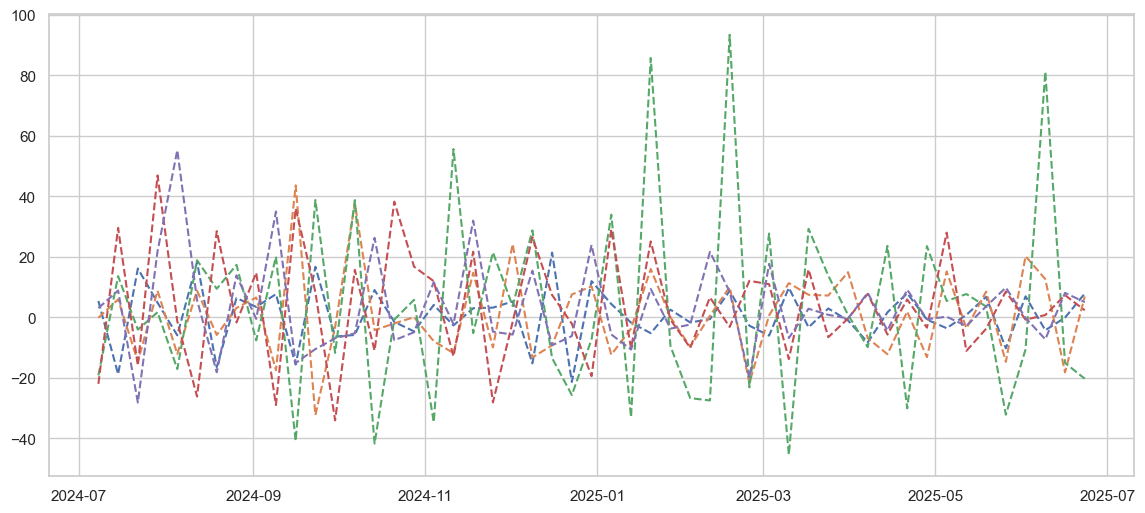

In [27]:
plt.figure(figsize=(14,6))
for col in growth_df.columns:
    if"_growth" in col:
        plt.plot(df['date'],growth_df[col], label=col.replace('_growth','')+ 'Growth',linestyle='--')

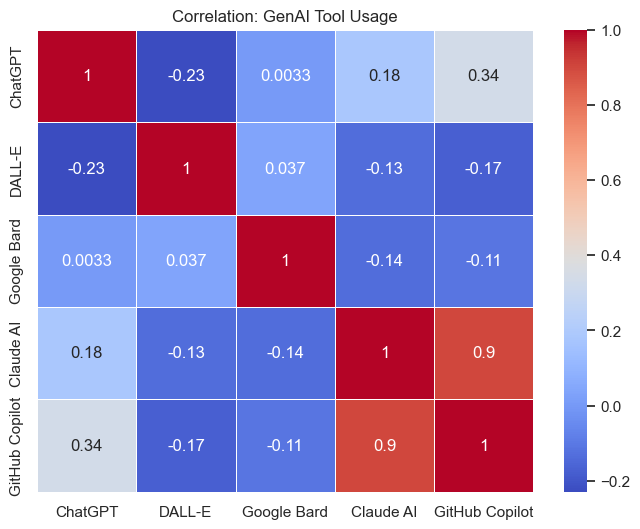

In [29]:
corr = df.iloc[:,1:].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation: GenAI Tool Usage")
plt.show()

In [31]:
df.to_csv("genai_usage_trends.csv", index= False)